In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from slam.motion_models.odometry_model import odometry_sample, odometry_command
from slam.utils import normalize_angle, sample_normal_distribution
from slam.robot import BaseRobot
from slam.data import read_simple_world, read_simple_data
from slam.particle_filter import ParticleFilterLocalization, low_variance_resampling

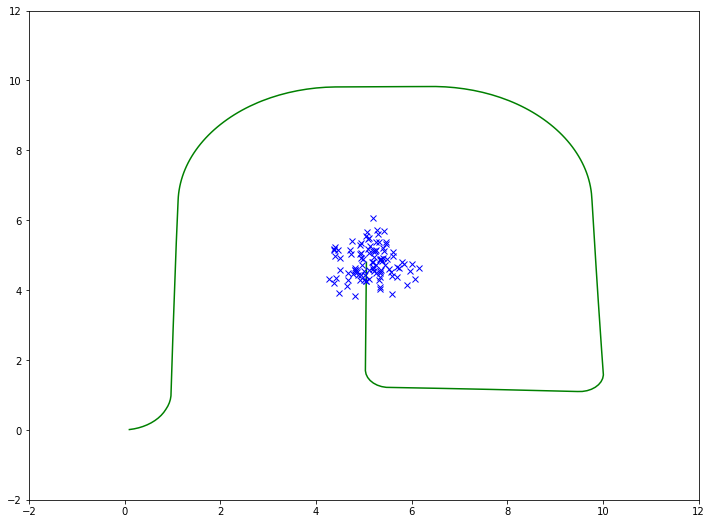

In [3]:
robot = BaseRobot(0, 0, 0, odometry_command)

odometry, sensor = read_simple_data('./data/simple/sensor_data.dat')
landmarks = read_simple_world('./data/simple/world.dat')

commands = [np.array(odom).T for odom in odometry]

pf = ParticleFilterLocalization(robot.pose, 100, odometry_sample, \
                                sample_normal_distribution, low_variance_resampling)

fig = plt.figure(figsize=(12, 9))
plt.xlim((-2, 12))
plt.ylim((-2, 12))

true_x = []
true_y = []
pf_x = []
pf_y = []

noise = (0.005, 0.01, 0.005)

for command, readings in zip(odometry, sensor):
    robot.motion_command(command)
    
    true_x.append(robot.pose.item(0))
    true_y.append(robot.pose.item(1))
    
    pf.predict(command, noise)
    
plt.plot(true_x, true_y, 'g')

for i, particle in enumerate(pf.particles):
    weight, pose = particle
    pf_x.append(pose.item(0))
    pf_y.append(pose.item(1))

plt.plot(pf_x, pf_y, 'bx')
    

In [4]:
np.random.normal(0, 0.1, 1)

array([-0.08564927])